In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

import urllib.request


/Users/conradkoziol/miniconda3/envs/geo/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/conradkoziol/miniconda3/envs/geo/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
%matplotlib inline

<b>Instructions to acquire the data:</b>
- Visit the following url: https://www.hydroshare.org/resource/397df3ba3266415a83225dc4392414b2/
- Download the file: waterhackweek_dalles_salmonfalls.nc
- Place it in the same directory as this jupyter notebook

In [3]:
data_file = 'waterhackweek_dalles_salmonfalls.nc'

ds = xr.open_dataset(data_file)

In [4]:
#Where to put output plots
outdir = 'output'
if not os.path.exists(outdir):
        os.makedirs(outdir)

In [5]:
#Will be working with RCP 8.5 Data, and contrast with RCP 4.5 at the end
ds_sel = ds.sel(rcp='rcp85', downscale_method='maca', parameters='calib_inverse', outlets=b'TDA')
ds_sel_45 = ds.sel(rcp='rcp45', downscale_method='maca', parameters='calib_inverse', outlets=b'TDA')

In [6]:
ds_sel

<xarray.Dataset>
Dimensions:           (gcm: 10, time: 54787)
Coordinates:
  * time              (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2099-12-31
    outlets           |S256 b'TDA'
    parameters        <U13 'calib_inverse'
    downscale_method  <U4 'maca'
  * gcm               (gcm) object 'hadgem2-cc' 'hadgem2-es' ... 'ccsm4'
    rcp               <U5 'rcp85'
Data variables:
    streamflow        (time, gcm) float64 ...

In [7]:
#Spread of [MEAN] flows in historical, present, and future scenarios 

periods = {'Historical': slice('1950', '1979'), 'Present': slice('2000', '2029'), 'Future': slice('2070', '2099')}
#periods = {'Present': slice('2000', '2029'), 'Future': slice('2070', '2099')}

df_mean = pd.DataFrame()
                                                                                                   
for p in periods.keys():                                                                                              
    data = ds_sel['streamflow'].sel(time=periods[p]).groupby('time.dayofyear').mean(dim='time').to_dataframe().reset_index()
    data['period'] = p
    df_mean = df_mean.append(pd.DataFrame(data))
    
df_mean.columns = df_mean.columns.str.capitalize()
df_mean.rename(columns={'Dayofyear':'Day of Year'}, inplace=True)
          
#sns.lineplot(x="Day of Year", hue="Period", y="Streamflow", data=df_max)

In [8]:
#Spread of [MAX] flows in historical, present, and future scenarios 


df_max = pd.DataFrame()
                                                                                                   
for p in periods.keys():                                                                                              
    data = ds_sel['streamflow'].sel(time=periods[p]).groupby('time.dayofyear').max(dim='time').to_dataframe().reset_index()
    data['period'] = p
    df_max = df_max.append(pd.DataFrame(data))
    
df_max.columns = df_max.columns.str.capitalize()
df_max.rename(columns={'Dayofyear':'Day of Year'}, inplace=True)
          
#sns.lineplot(x="Day of Year", hue="Period", y="Streamflow", data=df_max)

In [9]:
#Spread of [MIN] flows in historical, present, and future scenarios 

df_min = pd.DataFrame()
                                                                                                   
for p in periods.keys():                                                                                              
    data = ds_sel['streamflow'].sel(time=periods[p]).groupby('time.dayofyear').min(dim='time').to_dataframe().reset_index()
    data['period'] = p
    df_min = df_min.append(pd.DataFrame(data))
    
df_min.columns = df_min.columns.str.capitalize()
df_min.rename(columns={'Dayofyear':'Day of Year'}, inplace=True)
          
#sns.lineplot(x="Day of Year", hue="Period", y="Streamflow", data=df_min)

In [10]:
#Spread of [VARIABILITY] flows in historical, present, and future scenarios

df_var = pd.DataFrame()
                                                                                                   
for p in periods.keys():                                                                                              
    data = ds_sel['streamflow'].sel(time=periods[p]).groupby('time.dayofyear').max(dim='time').to_dataframe().reset_index()
    data2 = ds_sel['streamflow'].sel(time=periods[p]).groupby('time.dayofyear').min(dim='time').to_dataframe().reset_index()
    #data['streamflow'] = 100*(data['streamflow'] - data2['streamflow'])/data['streamflow']
    data['streamflow'] = data['streamflow'] - data2['streamflow']

    data['period'] = p
    df_var = df_var.append(pd.DataFrame(data))
    
df_var.columns = df_var.columns.str.capitalize()
df_var.rename(columns={'Dayofyear':'Day of Year'}, inplace=True)
          
#sns.lineplot(x="Day of Year", hue="Period", y="Streamflow", data=df_var)

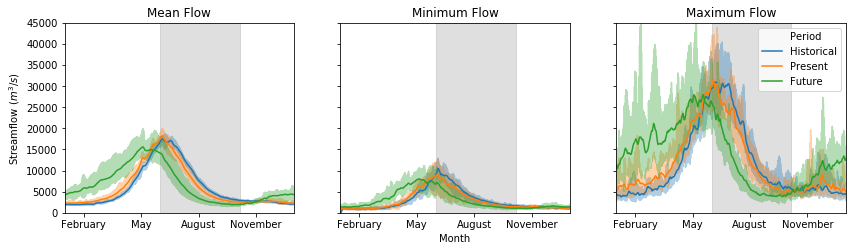

In [84]:
#Visualize the spread of mean, max, min flows at different periods

plt.figure(figsize=(14,3.5))

plt.subplot(1,3,1)
sns.lineplot(x="Day of Year", hue="Period", y="Streamflow", data=df_mean, alpha = 0.35, estimator=None)
sns.lineplot(x="Day of Year", hue="Period", y="Streamflow", data=df_mean, ci=None, legend=None)
plt.title('Mean Flow')
plt.ylim([0, 45000])
plt.ylabel('Streamflow ($m^{3} / s$)')
plt.xlabel('', visible=False)
plt.axvspan(150, 275, alpha=0.25, color='gray')
plt.xlim([0, 360])
plt.xticks([30, 120, 210, 300], ['February', 'May', 'August', 'November'])
plt.legend().set_visible(False)

plt.subplot(1,3,2)
sns.lineplot(x="Day of Year", hue="Period", y="Streamflow", data=df_min, alpha = 0.35, estimator=None)
sns.lineplot(x="Day of Year", hue="Period", y="Streamflow", data=df_min, ci=None, legend=None)
plt.title('Minimum Flow')
plt.ylim([0, 45000])
plt.ylabel('', visible=False)
plt.gca().set_yticklabels([])
plt.axvspan(150, 275, alpha=0.25, color='gray')
plt.xlim([0, 360])
plt.xticks([30, 120, 210, 300], ['February', 'May', 'August', 'November'])
plt.xlabel('Month')
plt.legend().set_visible(False)


plt.subplot(1,3,3)
sns.lineplot(x="Day of Year", hue="Period", y="Streamflow", data=df_max, alpha = 0.35, estimator=None)
sns.lineplot(x="Day of Year", hue="Period", y="Streamflow", data=df_max, ci=None, legend=None)
plt.title('Maximum Flow')
plt.ylim([0, 45000])
plt.ylabel('', visible=False)
plt.xlabel('', visible=False)
plt.axvspan(150, 275, alpha=0.25, color='gray')
plt.xlim([0, 360])
plt.xticks([30, 120, 210, 300], ['February', 'May', 'August', 'November'])

plt.gca().set_yticklabels([])

plt.savefig(os.path.join(outdir,'flow_spread.pdf'),bbox_inches = 'tight')


In [96]:
#Look at annual mean streamflow 
print('Historical:', df_mean[df_mean['Period'] == 'Historical'].groupby('Gcm')['Streamflow'].sum().mean())
print('Present:', df_mean[df_mean['Period'] == 'Present'].groupby('Gcm')['Streamflow'].sum().mean())
print('Future:', df_mean[df_mean['Period'] == 'Future'].groupby('Gcm')['Streamflow'].sum().mean())


Historical: 2171266.1532559693
Present: 2182201.0395436604
Future: 2392308.373616652


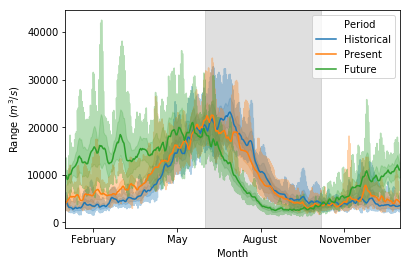

In [80]:
#Visualize the variability

plt.subplot(1,1,1)
sns.lineplot(x="Day of Year", hue="Period", y="Streamflow", data=df_var, alpha = 0.35, estimator=None)
sns.lineplot(x="Day of Year", hue="Period", y="Streamflow", data=df_var, legend=None)

plt.axvspan(150, 275, alpha=0.25, color='gray')
plt.ylabel('Range ($m^{3} / s$)')
plt.xlim([0, 360])
plt.xticks([30, 120, 210, 300], ['February', 'May', 'August', 'November'])
plt.xlabel('Month')

plt.savefig(os.path.join(outdir,'flow_variability.pdf'),bbox_inches = 'tight')



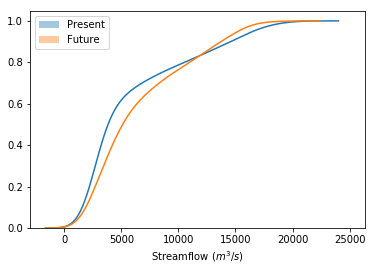

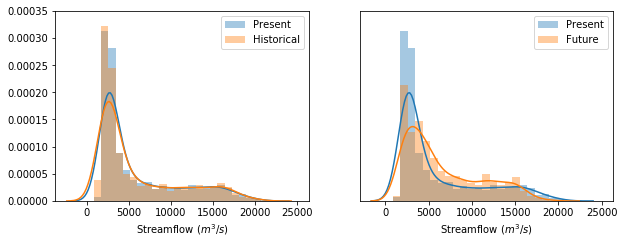

In [13]:
#Visualize the change in the mean flow PMF


freq = '7D'
nbins = np.linspace(0,25000, 30)

data_hist = ds_sel['streamflow'].sel(time=periods['Historical']).resample(time=freq).mean(dim='time').mean(dim='gcm')
data_pres = ds_sel['streamflow'].sel(time=periods['Present']).resample(time=freq).mean(dim='time').mean(dim='gcm')
data_fut = ds_sel['streamflow'].sel(time=periods['Future']).resample(time=freq).mean(dim='time').mean(dim='gcm')


plt.figure()
sns.distplot(data_pres, bins=nbins, kde_kws=dict(cumulative=True), label='Present')
sns.distplot(data_fut, bins=nbins, kde_kws=dict(cumulative=True), label='Future')
plt.xlabel('Streamflow ($m^{3} / s$)')
plt.legend()

plt.savefig(os.path.join(outdir,'flow_cdf.pdf'),bbox_inches = 'tight')



plt.figure(figsize=(10,3.5))
plt.subplot(1,2,1)
sns.distplot(data_pres, bins=nbins, label='Present')
sns.distplot(data_hist, bins=nbins, label='Historical')
plt.ylim([0, 3.5e-4])
plt.xlabel('Streamflow ($m^{3} / s$)')
plt.legend()


plt.subplot(1,2,2)
sns.distplot(data_pres, bins=nbins, label='Present')
sns.distplot(data_fut, bins=nbins,  label='Future')
plt.ylim([0, 3.5e-4])
plt.yticks([])
plt.xlabel('Streamflow ($m^{3} / s$)')
plt.legend()

plt.savefig(os.path.join(outdir,'flow_pmf.pdf'),bbox_inches = 'tight')




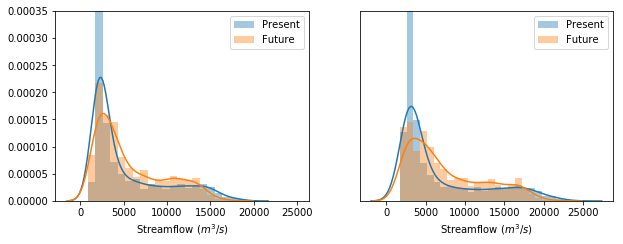

In [14]:
#Visualize the change in the low/max flow PMF


freq = '7D'
nbins = np.linspace(0,25000, 30)

data_pres_min = ds_sel['streamflow'].sel(time=periods['Present']).resample(time=freq).min(dim='time').mean(dim='gcm')
data_pres_max = ds_sel['streamflow'].sel(time=periods['Present']).resample(time=freq).max(dim='time').mean(dim='gcm')
data_fut_min = ds_sel['streamflow'].sel(time=periods['Future']).resample(time=freq).min(dim='time').mean(dim='gcm')
data_fut_max = ds_sel['streamflow'].sel(time=periods['Future']).resample(time=freq).max(dim='time').mean(dim='gcm')



plt.figure(figsize=(10,3.5))
plt.subplot(1,2,1)
sns.distplot(data_pres_min, bins=nbins, label='Present')
sns.distplot(data_fut_min, bins=nbins, label='Future')
plt.ylim([0, 3.5e-4])
plt.xlabel('Streamflow ($m^{3} / s$)')
plt.legend()


plt.subplot(1,2,2)
sns.distplot(data_pres_max, bins=nbins, label='Present')
sns.distplot(data_fut_max, bins=nbins, label='Future')
plt.ylim([0, 3.5e-4])
plt.yticks([])
plt.xlabel('Streamflow ($m^{3} / s$)')
plt.legend()

plt.savefig(os.path.join(outdir,'flow_pmf.pdf'),bbox_inches = 'tight')




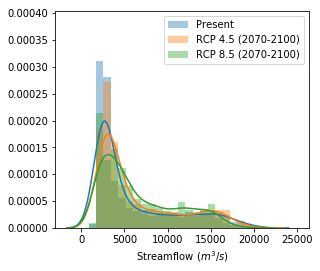

In [15]:
#Compare Present to different
nbins = np.linspace(0,25000, 30)

data_fut_45 = ds_sel_45['streamflow'].sel(time=periods['Future']).resample(time=freq).mean(dim='time').mean(dim='gcm')


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data_pres, bins=nbins, label='Present')
sns.distplot(data_fut_45, bins=nbins, label='RCP 4.5 (2070-2100)')
sns.distplot(data_fut, bins=nbins, label='RCP 8.5 (2070-2100)')
plt.ylim([0, 4.05e-4])
plt.xlabel('Streamflow ($m^{3} / s$)')
plt.legend()

plt.savefig(os.path.join(outdir,'flow_pmf_rcp.pdf'),bbox_inches = 'tight')

